In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import display
import sys
import pandas as pd
import seaborn.apionly as sns
import re
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.style.use('ggplot')
sns.set_style('ticks')
# Enable inline plotting  
%matplotlib inline

In [3]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)
print ('Numpy version ' + np.__version__)

Python version 3.5.5 | packaged by conda-forge | (default, Jul 23 2018, 23:45:11) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.23.4
Numpy version 1.15.2


In [6]:
data_1x='df7-comm-updated-1Xrmsd-v17.csv'
data_40x='df7-comm-updated-40Xrmsd-v17.csv'
data_70x='df7-comm-updated-70Xrmsd-v17.csv'
data_100x='df7-comm-updated-100Xrmsd-v17.csv'

In [7]:
df7_1x = pd.read_csv(data_1x)
df7_40x = pd.read_csv(data_40x)
df7_70x = pd.read_csv(data_70x)
df7_100x = pd.read_csv(data_100x)

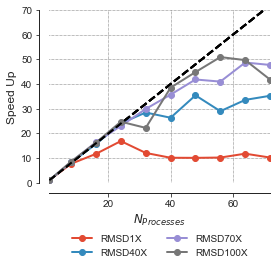

In [10]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

df = [df7_1x, df7_40x, df7_70x, df7_100x]
labels = ['RMSD1X','RMSD40X','RMSD70X','RMSD100X']
# labels = ['RMSD1X ($t_{compute}/t_{IO}=1/3$)','RMSD40X ($t_{compute}/t_{IO}=12$)','RMSD70X ($t_{compute}/t_{IO}=21$)','RMSD100X ($t_{compute}/t_{IO}=30$)']

for i in range(len(df)):
    ax.plot(df[i]['blocks'], df[i]['speed_up'], marker='o', lw=2, label=labels[i])
    ax.plot(df[i]['blocks'], df[i]['Ideal_Scaling'], linestyle='--', color='k', lw=2, label='')
    
ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel('Speed Up')
ax.set_xlim(1, 72)
ax.set_ylim(0, 70)

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.25), frameon=False,fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Compute_to_IO_ratio_on_performance_2d_v17'
# fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

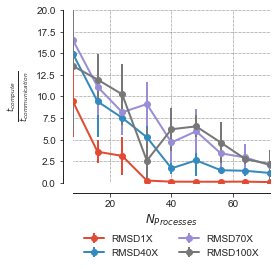

In [11]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

df = [df7_1x, df7_40x, df7_70x, df7_100x]
labels = ['RMSD1X','RMSD40X','RMSD70X','RMSD100X']
# labels = ['RMSD1X ($t_{compute}/t_{IO}=1/3$)','RMSD40X ($t_{compute}/t_{IO}=12$)','RMSD70X ($t_{compute}/t_{IO}=21$)','RMSD100X ($t_{compute}/t_{IO}=30$)']

for i in range(len(df)):
    std = ((df[i]['std_comp']/df[i]['t_comm_mean'])**2+
      (df[i]['t_comp']*df[i]['std_t_comm_mean']/df[i]['t_comm_mean']**2)**2)**0.5
    plt.errorbar(df[i]['blocks'], df[i]['t_comp']/df[i]['t_comm_mean'], std, marker='o', lw=2, label=labels[i])
    
ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel(r'$\frac{t_{compute}}{t_{communication}}$')
ax.set_xlim(8, 72)
ax.set_ylim(0, 20)

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.25), frameon=False,fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'Compute_to_comm_ratio_on_performance_v17'
# fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')

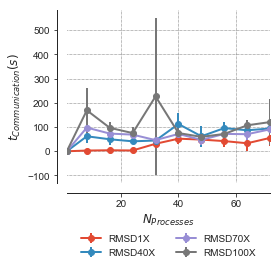

In [12]:
import matplotlib as mpl

matplotlib.rcParams['legend.fontsize'] = 10
plt.style.use('ggplot')
sns.set_style('ticks')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)

df = [df7_1x, df7_40x, df7_70x, df7_100x]
labels = ['RMSD1X','RMSD40X','RMSD70X','RMSD100X']
# labels = ['RMSD1X ($t_{compute}/t_{IO}=1/3$)','RMSD40X ($t_{compute}/t_{IO}=12$)','RMSD70X ($t_{compute}/t_{IO}=21$)','RMSD100X ($t_{compute}/t_{IO}=30$)']

for i in range(len(df)):
    plt.errorbar(df[i]['blocks'], df[i]['t_comm_mean'],df[i]['std_t_comm_mean'], marker='o', lw=2, label=labels[i])
    
ax.set_xlabel('$N_{Processes}$')
ax.set_ylabel('$t_{Communication} (s)$')
ax.set_xlim(1, 72)
# ax.set_ylim(0, 70)

ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
ax.yaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid(which='minor',linestyle=':', linewidth='0.5', color='black') 

sns.despine(offset=10, ax=ax)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.50, -0.25), frameon=False,fancybox=True, shadow=True, ncol=2)
plt.tight_layout()
plt.show()
fig_name = 'comm_comparison_different_RMSD_overload'
# fig.savefig('{}.pdf'.format(fig_name),bbox_extra_artists=(lgd,), bbox_inches='tight')